<a href="https://colab.research.google.com/github/Do1kk/COVID-19_Project/blob/master/Copy_of_ProjectPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Porównanie dwóch wybranych modeli ML do przewidywania zgonów z powodu wybuchu COVID-19**

## **Pobranie danych z 2 źródeł.**

In [87]:
import urllib.request
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
plt.style.use('seaborn-whitegrid')

### Pierwsze źródło

In [88]:
# Manage first source of data.
url1 = "https://raw.githubusercontent.com/dtandev/coronavirus/master/data/CoronavirusPL%20-%20General.csv"
data1 = pd.read_csv(url1)
data1.tail()

,Timestamp,Confirmed,Deaths,Recovered,In_the_hospital,In_quarantine,Under_medical_supervision,Number_of_tests_carried_out
102,13-06-2020,29017,1237,9416,1748,93094,18666,1169088
103,14-06-2020,29392,1247,9555,1736,94518,17966,1188742
104,15-06-2020,29788,1256,9668,1806,95641,17261,1202024
105,16-06-2020,30195,1272,9936,1693,96255,17195,1221133
106,17-06-2020,30701,1286,10284,1849,93722,17354,1247099


In [89]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Timestamp                    107 non-null    object
 1   Confirmed                    107 non-null    int64 
 2   Deaths                       107 non-null    int64 
 3   Recovered                    107 non-null    int64 
 4   In_the_hospital              107 non-null    int64 
 5   In_quarantine                107 non-null    int64 
 6   Under_medical_supervision    107 non-null    int64 
 7   Number_of_tests_carried_out  107 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.8+ KB


In [90]:
data1.describe()

,Confirmed,Deaths,Recovered,In_the_hospital,In_quarantine,Under_medical_supervision,Number_of_tests_carried_out
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02
mean,12006.504673,533.775701,2984.616822,1995.757009,85302.813084,24949.467290,4.027432e+05
std,9836.652463,456.829998,3355.924164,825.179373,44316.603847,13505.353918,3.949041e+05
min,0.000000,0.000000,0.000000,65.000000,316.000000,4459.000000,5.590000e+02
25%,1958.500000,26.500000,21.500000,1698.000000,77614.500000,18012.500000,4.469500e+04
50%,11273.000000,524.000000,1391.000000,2248.000000,87003.000000,19161.000000,2.789940e+05
75%,20381.000000,977.000000,5774.000000,2557.500000,101089.500000,29850.000000,7.084005e+05
max,30701.000000,1286.000000,10284.000000,3505.000000,183095.000000,59081.000000,1.247099e+06


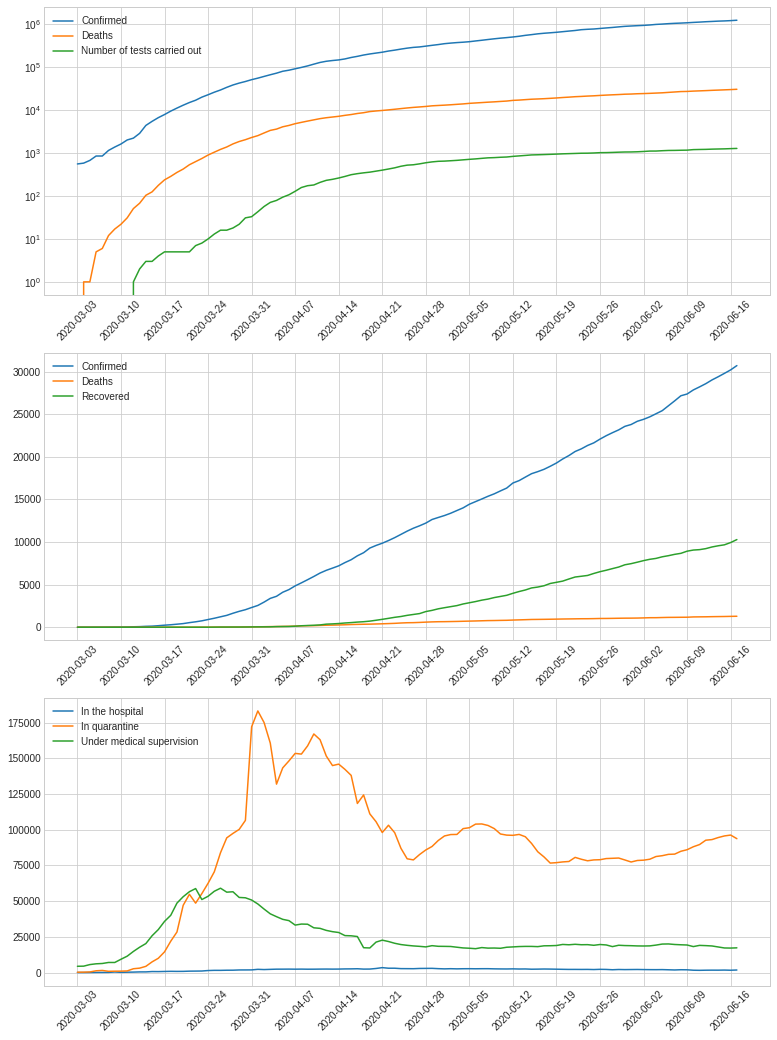

In [91]:
X_axis = pd.to_datetime(data1["Timestamp"], dayfirst=True)
plt.figure(figsize=[13, 18])

plt.subplot(311)
plt.plot(X_axis, data1[["Number_of_tests_carried_out", "Confirmed", "Deaths"]])
plt.xticks(list((d for d in X_axis if d.dayofweek == 1)), rotation=45)
plt.yscale("log")
plt.legend(("Confirmed", "Deaths", "Number of tests carried out"), loc='upper left')

plt.subplot(312)
plt.plot(X_axis, data1[["Confirmed", "Deaths", "Recovered"]])
plt.xticks(list((d for d in X_axis if d.dayofweek == 1)), rotation=45)
plt.legend(("Confirmed", "Deaths", "Recovered"), loc='upper left')

plt.subplot(313)
plt.plot(X_axis, data1[["In_the_hospital", "In_quarantine", "Under_medical_supervision"]])
plt.xticks(list((d for d in X_axis if d.dayofweek == 1)), rotation=45)
plt.legend(("In the hospital", "In quarantine", "Under medical supervision"), loc='upper left')

plt.show()

### Drugie źródło

In [123]:
# Manage second source of data.
url2_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url2_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url2_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

data2_confirmed = pd.read_csv(url2_confirmed)
data2_deaths = pd.read_csv(url2_deaths)
data2_recovered = pd.read_csv(url2_recovered)

data2_confirmed = data2_confirmed[data2_confirmed["Country/Region"] == "Poland"].T
data2_deaths = data2_deaths[data2_deaths["Country/Region"] == "Poland"].T
data2_recovered = data2_recovered[data2_recovered["Country/Region"] == "Poland"].T

data2 = data2_confirmed.rename(columns={data2_confirmed.columns[0]: "Confirmed"})
data2["Deaths"], data2["Recovered"] = data2_deaths, data2_recovered
data2.drop(['Lat', 'Long'], inplace=True)

data2["Confirmed"] = pd.to_numeric(data2["Confirmed"], errors='coerce')
data2["Deaths"] = pd.to_numeric(data2["Deaths"], errors='coerce')
data2["Recovered"] = pd.to_numeric(data2["Recovered"], errors='coerce')
data2.dropna(inplace=True)
data2 = data2.astype(int)
data2["Timestamp"] = data2.index
data2.reset_index(inplace=True, drop=True)
data2.drop(list(range(41)), inplace=True) # Cut to 3/3/20

data2.tail()

,Confirmed,Deaths,Recovered,Timestamp
150,31620,1346,16181,6/20/20
151,31931,1356,16683,6/21/20
152,32227,1359,17076,6/22/20
153,32527,1375,17573,6/23/20
154,33119,1412,18654,6/24/20


In [120]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 41 to 154
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Confirmed  114 non-null    int64 
 1   Deaths     114 non-null    int64 
 2   Recovered  114 non-null    int64 
 3   Timestamp  114 non-null    object
dtypes: int64(3), object(1)
memory usage: 4.5+ KB


In [121]:
data2.describe()

,Confirmed,Deaths,Recovered
count,114.000000,114.000000,114.000000
mean,13233.315789,584.438596,5240.921053
std,10677.767856,485.083188,5704.486280
min,0.000000,0.000000,0.000000
25%,2371.750000,35.500000,21.500000
50%,12429.000000,610.000000,2840.000000
75%,22373.250000,1027.000000,10252.500000
max,33119.000000,1412.000000,18654.000000


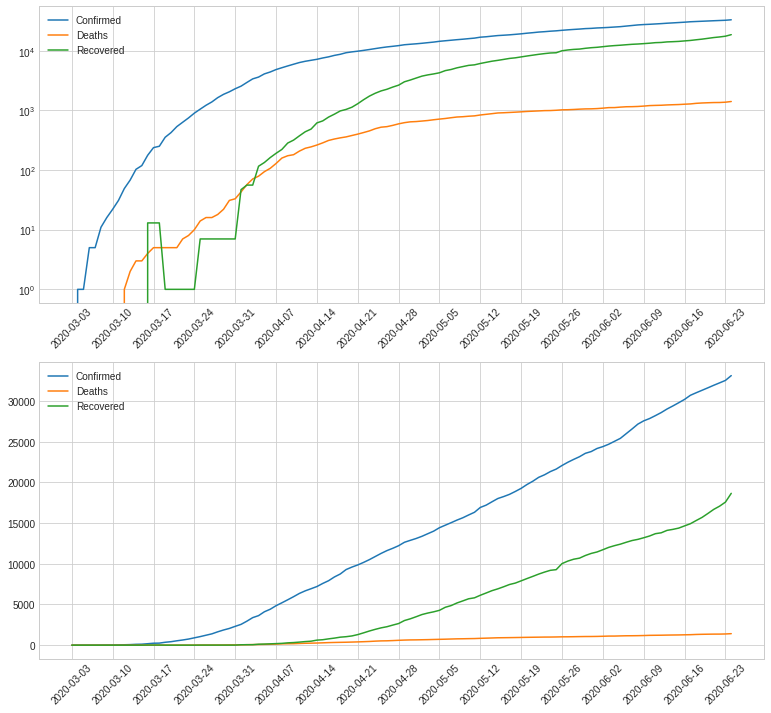

In [122]:
X_axis = pd.to_datetime(data2["Timestamp"], dayfirst=False)
plt.figure(figsize=[13, 12])

plt.subplot(211)
plt.plot(X_axis, data2[["Confirmed", "Deaths", "Recovered"]])
plt.xticks(list((d for d in X_axis if d.dayofweek == 1)), rotation=45)
plt.yscale("log")
plt.legend(("Confirmed", "Deaths", "Recovered"), loc='upper left')

plt.subplot(212)
plt.plot(X_axis, data2[["Confirmed", "Deaths", "Recovered"]])
plt.xticks(list((d for d in X_axis if d.dayofweek == 1)), rotation=45)
plt.legend(("Confirmed", "Deaths", "Recovered"), loc='upper left')

plt.show()